In [177]:
import numpy as np
import pandas as pd

In [178]:
train = pd.read_csv('https://mathweb.ucsd.edu/~wez243/spam-train.txt', sep = ',', header=None)
test = pd.read_csv('https://mathweb.ucsd.edu/~wez243/spam-test.txt', sep = ',', header = None)

Standardized

In [179]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
test_scaled = scaler.fit_transform(test)
test_scaled = pd.DataFrame(test_scaled, columns=test.columns)

Log

In [180]:
train_log = np.log(train+ 1)
test_log = np.log(test+1)

Discretized

In [181]:
train_disc = (train > 0).astype(int)
test_disc = (test > 0).astype(int)

## Visualize

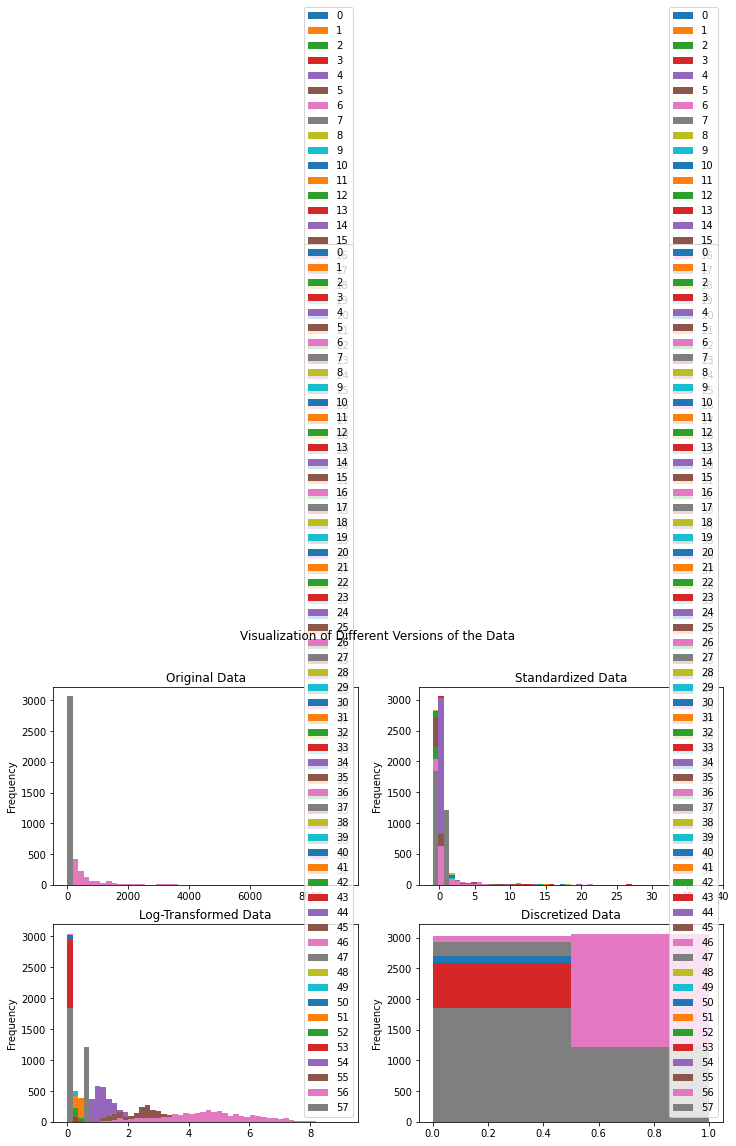

In [182]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

train.plot(ax=axes[0, 0], kind='hist', bins=50, title='Original Data')

# plot the standardized data
train_scaled.plot(ax=axes[0, 1], kind='hist', bins=50, title='Standardized Data')

# plot the log-transformed data
train_log.plot(ax=axes[1, 0], kind='hist', bins=50, title='Log-Transformed Data')

# plot the discretized data
train_disc.plot(ax=axes[1, 1], kind='hist', bins=2, title='Discretized Data')

# set the overall title for the figure
fig.suptitle('Visualization of Different Versions of the Data')

# display the figure
plt.show()

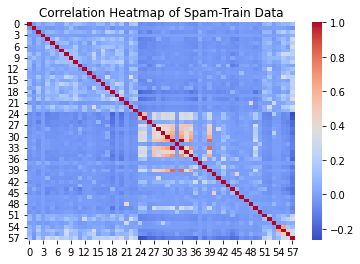

In [183]:
import seaborn as sns
corr_matrix = train.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap of Spam-Train Data')
plt.show()

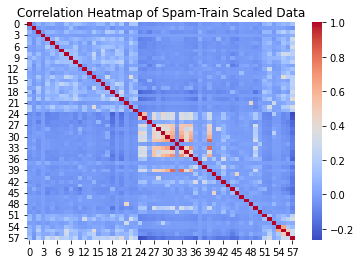

In [184]:
corr_matrix = train_scaled.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap of Spam-Train Scaled Data')
plt.show()

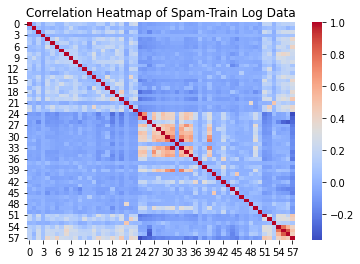

In [185]:
corr_matrix = train_log.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap of Spam-Train Log Data')
plt.show()

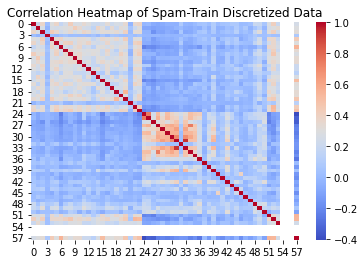

In [186]:
corr_matrix = train_disc.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap of Spam-Train Discretized Data')
plt.show()

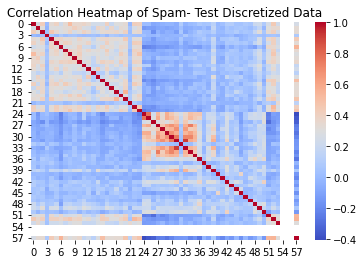

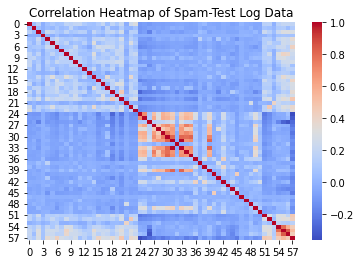

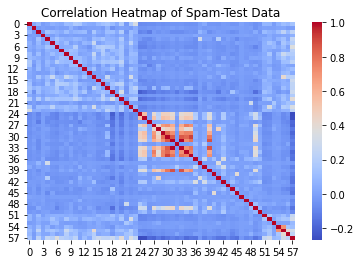

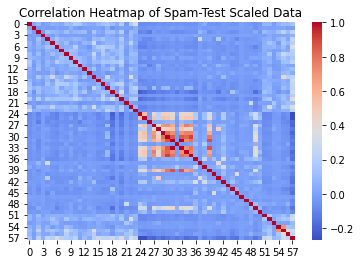

In [187]:
corr_matrix = test_disc.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap of Spam- Test Discretized Data')
plt.show()
corr_matrix = test_log.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap of Spam-Test Log Data')
plt.show()
corr_matrix = test.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap of Spam-Test Data')
plt.show()
corr_matrix = test_scaled.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap of Spam-Test Scaled Data')
plt.show()

#b

### Standardized



In [188]:
from sklearn.linear_model import LogisticRegression
X_train_stan = train_scaled.iloc[:, :-1]
y_train = train.iloc[:, -1]
X_test_stan = test_scaled.iloc[:, :-1]
y_test = test.iloc[:, -1]

# Create logistic regression model and fit to standardized training set
lr = LogisticRegression()
lr.fit(X_train_stan, y_train)

# Calculate classification errors on standardized training and test sets
stanlrtrain_error = 1 - lr.score(X_train_stan, y_train)
stanlrtest_error = 1 - lr.score(X_test_stan, y_test)
print("Classification error on standardized training set:", stanlrtrain_error)
print("Classification error on standardized test set:", stanlrtest_error)

Classification error on standardized training set: 0.07303553961525922
Classification error on standardized test set: 0.07105606258148633


In [189]:
from scipy.stats import norm

p_values = lr.coef_[0]
p_values = [2 * (1 - norm.cdf(abs(x))) for x in p_values]

# Print the p-values for each feature
significant_features = [i for i in range(len(p_values)) if p_values[i] < 0.05]
print("Significant features:", significant_features)

Significant features: [24, 26]


### Log

In [190]:
X_train_log = train_log.iloc[:, :-1]
y_train = train.iloc[:, -1]
X_test_log = test_log.iloc[:, :-1]
y_test = test.iloc[:, -1]

# Create logistic regression model and fit to standardized training set
lr = LogisticRegression()
lr.fit(X_train_log, y_train)

# Calculate classification errors on standardized training and test sets
loglrtrain_error = 1 - lr.score(X_train_log, y_train)
loglrtest_error = 1 - lr.score(X_test_log, y_test)
print("Classification error on standardized training set:", loglrtrain_error)
print("Classification error on standardized test set:", loglrtest_error)

Classification error on standardized training set: 0.056080860776002606
Classification error on standardized test set: 0.05671447196870927


In [191]:
p_values = lr.coef_[0]
p_values = [2 * (1 - norm.cdf(abs(x))) for x in p_values]

# Print the p-values for each feature
significant_features = [i for i in range(len(p_values)) if p_values[i] < 0.05]
print("Significant features:", significant_features)

Significant features: [6, 22, 24, 26, 41, 51, 52]


### Discretized

In [192]:
X_train_disc = train_disc.iloc[:, :-1]
y_train = train.iloc[:, -1]
X_test_disc = test_disc.iloc[:, :-1]
y_test = test.iloc[:, -1]

# Create logistic regression model and fit to standardized training set
lr = LogisticRegression()
lr.fit(X_train_disc, y_train)

# Calculate classification errors on standardized training and test sets
disclrtrain_error = 1 - lr.score(X_train_disc, y_train)
disclrtest_error = 1 - lr.score(X_test_disc, y_test)
print("Classification error on standardized training set:", disclrtrain_error)
print("Classification error on standardized test set:", disclrtest_error)

Classification error on standardized training set: 0.06260189109879366
Classification error on standardized test set: 0.07887874837027375


In [193]:
p_values = lr.coef_[0]
p_values = [2 * (1 - norm.cdf(abs(x))) for x in p_values]

# Print the p-values for each feature
significant_features = [i for i in range(len(p_values)) if p_values[i] < 0.05]
print("Significant features:", significant_features)

Significant features: [6, 24, 26]


#c

## Standardized

In [194]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Fit a linear discriminant analysis model on the training data
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_stan, y_train)

# Compute the training and test classification errors for LDA
y_pred_train_lda = lda.predict(X_train_stan)
y_pred_test_lda = lda.predict(X_test_stan)
stantrain_error_lda = 1 - accuracy_score(y_train, y_pred_train_lda)
stantest_error_lda = 1 - accuracy_score(y_test, y_pred_test_lda)

# Fit a quadratic discriminant analysis model on the training data
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_stan, y_train)

# Compute the training and test classification errors for QDA
y_pred_train_qda = qda.predict(X_train_stan)
y_pred_test_qda = qda.predict(X_test_stan)
stantrain_error_qda = 1 - accuracy_score(y_train, y_pred_train_qda)
stantest_error_qda = 1 - accuracy_score(y_test, y_pred_test_qda)

# Print the classification errors
print("Linear Discriminant Analysis:")
print(f"Training error: {stantrain_error_lda:.4f}")
print(f"Test error: {stantest_error_lda:.4f}\n")
print("Quadratic Discriminant Analysis:")
print(f"Training error: {stantrain_error_qda:.4f}")
print(f"Test error: {stantest_error_qda:.4f}")

Linear Discriminant Analysis:
Training error: 0.1017
Test error: 0.1030

Quadratic Discriminant Analysis:
Training error: 0.1787
Test error: 0.1747


## Log

In [195]:
# Fit a linear discriminant analysis model on the training data
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_log, y_train)

# Compute the training and test classification errors for LDA
y_pred_train_lda = lda.predict(X_train_log)
y_pred_test_lda = lda.predict(X_test_log)
logtrain_error_lda = 1 - accuracy_score(y_train, y_pred_train_lda)
logtest_error_lda = 1 - accuracy_score(y_test, y_pred_test_lda)

# Fit a quadratic discriminant analysis model on the training data
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_log, y_train)

# Compute the training and test classification errors for QDA
y_pred_train_qda = qda.predict(X_train_log)
y_pred_test_qda = qda.predict(X_test_log)
logtrain_error_qda = 1 - accuracy_score(y_train, y_pred_train_qda)
logtest_error_qda = 1 - accuracy_score(y_test, y_pred_test_qda)

# Print the classification errors
print("Linear Discriminant Analysis:")
print(f"Training error: {logtrain_error_lda:.4f}")
print(f"Test error: {logtest_error_lda:.4f}\n")
print("Quadratic Discriminant Analysis:")
print(f"Training error: {logtrain_error_qda:.4f}")
print(f"Test error: {logtest_error_qda:.4f}")

Linear Discriminant Analysis:
Training error: 0.0603
Test error: 0.0652

Quadratic Discriminant Analysis:
Training error: 0.1588
Test error: 0.1571


# D

## Standardized

In [196]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Fit a linear SVM classifier on the training data
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_stan, y_train)

# Compute the training and test classification errors for linear SVM
y_pred_train_linear = svm_linear.predict(X_train_stan)
y_pred_test_linear = svm_linear.predict(X_test_stan)
stantrain_error_linear = 1 - accuracy_score(y_train, y_pred_train_linear)
stantest_error_linear = 1 - accuracy_score(y_test, y_pred_test_linear)

# Fit a nonlinear SVM classifier on the training data
svm_nonlinear = SVC(kernel='rbf')
svm_nonlinear.fit(X_train_stan, y_train)

# Compute the training and test classification errors for nonlinear SVM
y_pred_train_nonlinear = svm_nonlinear.predict(X_train_stan)
y_pred_test_nonlinear = svm_nonlinear.predict(X_test_stan)
stantrain_error_nonlinear = 1 - accuracy_score(y_train, y_pred_train_nonlinear)
stantest_error_nonlinear = 1 - accuracy_score(y_test, y_pred_test_nonlinear)

# Print the classification errors
print("Linear SVM:")
print(f"Training error: {stantrain_error_linear:.4f}")
print(f"Test error: {stantest_error_linear:.4f}\n")
print("Nonlinear SVM:")
print(f"Training error: {stantrain_error_nonlinear:.4f}")
print(f"Test error: {stantest_error_nonlinear:.4f}")

Linear SVM:
Training error: 0.0649
Test error: 0.0717

Nonlinear SVM:
Training error: 0.0515
Test error: 0.0645


## Log

In [197]:
# Fit a linear SVM classifier on the training data
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_log, y_train)

# Compute the training and test classification errors for linear SVM
y_pred_train_linear = svm_linear.predict(X_train_log)
y_pred_test_linear = svm_linear.predict(X_test_log)
logtrain_error_linear = 1 - accuracy_score(y_train, y_pred_train_linear)
logtest_error_linear = 1 - accuracy_score(y_test, y_pred_test_linear)

# Fit a nonlinear SVM classifier on the training data
svm_nonlinear = SVC(kernel='rbf')
svm_nonlinear.fit(X_train_log, y_train)

# Compute the training and test classification errors for nonlinear SVM
y_pred_train_nonlinear = svm_nonlinear.predict(X_train_log)
y_pred_test_nonlinear = svm_nonlinear.predict(X_test_log)
logtrain_error_nonlinear = 1 - accuracy_score(y_train, y_pred_train_nonlinear)
logtest_error_nonlinear = 1 - accuracy_score(y_test, y_pred_test_nonlinear)

# Print the classification errors
print("Linear SVM:")
print(f"Training error: {logtrain_error_linear:.4f}")
print(f"Test error: {logtest_error_linear:.4f}\n")
print("Nonlinear SVM:")
print(f"Training error: {logtrain_error_nonlinear:.4f}")
print(f"Test error: {logtest_error_nonlinear:.4f}")

Linear SVM:
Training error: 0.0584
Test error: 0.0561

Nonlinear SVM:
Training error: 0.0561
Test error: 0.0548


## Discretized

In [198]:
# Fit a linear SVM classifier on the training data
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_disc, y_train)

# Compute the training and test classification errors for linear SVM
y_pred_train_linear = svm_linear.predict(X_train_disc)
y_pred_test_linear = svm_linear.predict(X_test_disc)
disctrain_error_linear = 1 - accuracy_score(y_train, y_pred_train_linear)
disctest_error_linear = 1 - accuracy_score(y_test, y_pred_test_linear)

# Fit a nonlinear SVM classifier on the training data
svm_nonlinear = SVC(kernel='rbf')
svm_nonlinear.fit(X_train_disc, y_train)

# Compute the training and test classification errors for nonlinear SVM
y_pred_train_nonlinear = svm_nonlinear.predict(X_train_disc)
y_pred_test_nonlinear = svm_nonlinear.predict(X_test_disc)
disctrain_error_nonlinear = 1 - accuracy_score(y_train, y_pred_train_nonlinear)
disctest_error_nonlinear = 1 - accuracy_score(y_test, y_pred_test_nonlinear)

# Print the classification errors
print("Linear SVM:")
print(f"Training error: {disctrain_error_linear:.4f}")
print(f"Test error: {disctest_error_linear:.4f}\n")
print("Nonlinear SVM:")
print(f"Training error: {disctrain_error_nonlinear:.4f}")
print(f"Test error: {disctest_error_nonlinear:.4f}")

Linear SVM:
Training error: 0.0603
Test error: 0.0743

Nonlinear SVM:
Training error: 0.0404
Test error: 0.0580


# E

## Standardized

In [199]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Fit a decision tree classifier on the training data
tree = DecisionTreeClassifier()
tree.fit(X_train_stan, y_train)

# Compute the training and test classification errors for the decision tree
y_pred_train_tree = tree.predict(X_train_stan)
y_pred_test_tree = tree.predict(X_test_stan)
stantrain_error_tree = 1 - accuracy_score(y_train, y_pred_train_tree)
stantest_error_tree = 1 - accuracy_score(y_test, y_pred_test_tree)

# Fit a random forest classifier on the training data
forest = RandomForestClassifier()
forest.fit(X_train_stan, y_train)

# Compute the training and test classification errors for the random forest
y_pred_train_forest = forest.predict(X_train_stan)
y_pred_test_forest = forest.predict(X_test_stan)
stantrain_error_forest = 1 - accuracy_score(y_train, y_pred_train_forest)
stantest_error_forest = 1 - accuracy_score(y_test, y_pred_test_forest)

# Print the classification errors
print("Decision Tree:")
print(f"Training error: {stantrain_error_tree:.4f}")
print(f"Test error: {stantest_error_tree:.4f}\n")
print("Random Forest:")
print(f"Training error: {stantrain_error_forest:.4f}")
print(f"Test error: {stantest_error_forest:.4f}")

Decision Tree:
Training error: 0.0000
Test error: 0.1037

Random Forest:
Training error: 0.0000
Test error: 0.0306


## Log

In [200]:
# Fit a decision tree classifier on the training data
tree = DecisionTreeClassifier()
tree.fit(X_train_log, y_train)

# Compute the training and test classification errors for the decision tree
y_pred_train_tree = tree.predict(X_train_log)
y_pred_test_tree = tree.predict(X_test_log)
logtrain_error_tree = 1 - accuracy_score(y_train, y_pred_train_tree)
logtest_error_tree = 1 - accuracy_score(y_test, y_pred_test_tree)

# Fit a random forest classifier on the training data
forest = RandomForestClassifier()
forest.fit(X_train_log, y_train)

# Compute the training and test classification errors for the random forest
y_pred_train_forest = forest.predict(X_train_log)
y_pred_test_forest = forest.predict(X_test_log)
logtrain_error_forest = 1 - accuracy_score(y_train, y_pred_train_forest)
logtest_error_forest = 1 - accuracy_score(y_test, y_pred_test_forest)

# Print the classification errors
print("Decision Tree:")
print(f"Training error: {logtrain_error_tree:.4f}")
print(f"Test error: {logtest_error_tree:.4f}\n")
print("Random Forest:")
print(f"Training error: {logtrain_error_forest:.4f}")
print(f"Test error: {logtest_error_forest:.4f}")

Decision Tree:
Training error: 0.0000
Test error: 0.0554

Random Forest:
Training error: 0.0000
Test error: 0.0189


## Discretized

In [201]:
# Fit a decision tree classifier on the training data
tree = DecisionTreeClassifier()
tree.fit(X_train_disc, y_train)

# Compute the training and test classification errors for the decision tree
y_pred_train_tree = tree.predict(X_train_disc)
y_pred_test_tree = tree.predict(X_test_disc)
disctrain_error_tree = 1 - accuracy_score(y_train, y_pred_train_tree)
disctest_error_tree = 1 - accuracy_score(y_test, y_pred_test_tree)

# Fit a random forest classifier on the training data
forest = RandomForestClassifier()
forest.fit(X_train_disc, y_train)

# Compute the training and test classification errors for the random forest
y_pred_train_forest = forest.predict(X_train_disc)
y_pred_test_forest = forest.predict(X_test_disc)
disctrain_error_forest = 1 - accuracy_score(y_train, y_pred_train_forest)
disctest_error_forest = 1 - accuracy_score(y_test, y_pred_test_forest)

# Print the classification errors
print("Decision Tree:")
print(f"Training error: {disctrain_error_tree:.4f}")
print(f"Test error: {disctest_error_tree:.4f}\n")
print("Random Forest:")
print(f"Training error: {disctrain_error_forest:.4f}")
print(f"Test error: {disctest_error_forest:.4f}")

Decision Tree:
Training error: 0.0068
Test error: 0.0561

Random Forest:
Training error: 0.0068
Test error: 0.0404


## Table

In [202]:
data = {'Preprocessing': ['Standardized', 'Standardized', 'Standardized', 'Standardized', 'Standardized', 'Standardized', 'Standardized', 'Log', 'Log', 'Log', 'Log', 'Log', 'Log', 'Log', 'Discrtized', 'Discrtized', 'Discrtized', 'Discrtized', 'Discrtized', 'Discrtized', 'Discrtized'],
        'Classifier': ['Logistic Regression', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Linear SVM', 'Nonlinear SVM', 'Decision Tree', 'RandomForest', 
                       'Logistic Regression', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Linear SVM', 'Nonlinear SVM', 'Decision Tree', 'RandomForest',
                       'Logistic Regression', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Linear SVM', 'Nonlinear SVM', 'Decision Tree', 'RandomForest'],
        'Training error': [stanlrtrain_error, stantrain_error_lda, stantrain_error_qda, stantrain_error_linear, stantrain_error_nonlinear, stantrain_error_tree, stantrain_error_forest,
                           loglrtrain_error, logtrain_error_lda, logtrain_error_qda, logtrain_error_linear, logtrain_error_nonlinear, logtrain_error_tree, logtrain_error_forest,
                           disclrtrain_error, 'N/A', 'N/A', disctrain_error_linear, disctrain_error_nonlinear, disctrain_error_tree, disctrain_error_forest],
        'Test error': [stanlrtest_error, stantest_error_lda, stantest_error_qda, stantest_error_linear, stantest_error_nonlinear, stantest_error_tree, stantest_error_forest,
                       loglrtest_error, logtest_error_lda, logtest_error_qda, logtest_error_linear, logtest_error_nonlinear, logtest_error_tree, logtest_error_forest,
                       disclrtest_error, 'N/A', 'N/A', disctest_error_linear, disctest_error_nonlinear, disctest_error_tree, disctest_error_forest]}

# create a DataFrame from the dictionary
df = pd.DataFrame(data)

# print the DataFrame
df

,Preprocessing,Classifier,Training error,Test error
0,Standardized,Logistic Regression,0.073036,0.071056
1,Standardized,Linear Discriminant Analysis,0.101728,0.102999
2,Standardized,Quadratic Discriminant Analysis,0.178676,0.174707
3,Standardized,Linear SVM,0.064884,0.071708
4,Standardized,Nonlinear SVM,0.051516,0.064537
5,Standardized,Decision Tree,0.0,0.103651
6,Standardized,RandomForest,0.0,0.030639
7,Log,Logistic Regression,0.056081,0.056714
8,Log,Linear Discriminant Analysis,0.06032,0.065189
9,Log,Quadratic Discriminant Analysis,0.158787,0.157106


Looking at the table, it appears that the log preprocessing has the lowest training error and test error for the Logistic Regression, Linear SVM, Nonlinear SVM, and Decision Tree classifiers. The Random Forest classifier also performs well with both standardization and discretization, achieving 0 training error and low test error.

## Conclusion

Based on my analysis, I recommend using the log preprocessing  for this task, as it results in lower training and test errors across all classifiers when compared to the discretized and standardized approaches. For prediction, I suggest using random forest classifier. You can also use a voting classifier/adaboost classifier with random forest as the estimator

In [203]:
from sklearn.ensemble import VotingClassifier
train = pd.read_csv('https://mathweb.ucsd.edu/~wez243/spam-train.txt', sep = ',', header=None)
test = pd.read_csv('https://mathweb.ucsd.edu/~wez243/spam-test.txt', sep = ',', header = None)
train_log = np.log(train+ 1)
test_log = np.log(test+1)
X_train_log = train_log.iloc[:, :-1]
y_train = train.iloc[:, -1]
X_test_log = test_log.iloc[:, :-1]
y_test = test.iloc[:, -1]

ensemble_clf = VotingClassifier(
    estimators=[('rf', RandomForestClassifier())], 
    voting = 'soft'
)
ensemble_clf.fit(X_train_log, y_train)

ypredtrain = ensemble_clf.predict(X_train_log)
ypredtest = ensemble_clf.predict(X_test_log)
train_error = 1 - accuracy_score(y_train, ypredtrain)
test_error = 1 - accuracy_score(y_test, ypredtest)

# Print the classification errors
print("Voting Classifier for RF:")
print(f"Training error: {train_error:.4f}")
print(f"Test error: {test_error:.4f}")

Voting Classifier for RF:
Training error: 0.0000
Test error: 0.0228


In [204]:
from sklearn.ensemble import AdaBoostClassifier
train = pd.read_csv('https://mathweb.ucsd.edu/~wez243/spam-train.txt', sep = ',', header=None)
test = pd.read_csv('https://mathweb.ucsd.edu/~wez243/spam-test.txt', sep = ',', header = None)
train_log = np.log(train+ 1)
test_log = np.log(test+1)
X_train_log = train_log.iloc[:, :-1]
y_train = train.iloc[:, -1]
X_test_log = test_log.iloc[:, :-1]
y_test = test.iloc[:, -1]

ensemble_clf = AdaBoostClassifier(
    estimator=RandomForestClassifier(),
)
ensemble_clf.fit(X_train_log, y_train)

ypredtrain = ensemble_clf.predict(X_train_log)
ypredtest = ensemble_clf.predict(X_test_log)
train_error = 1 - accuracy_score(y_train, ypredtrain)
test_error = 1 - accuracy_score(y_test, ypredtest)

# Print the classification errors
print("AdaBoost Classifier for RF:")
print(f"Training error: {train_error:.4f}")
print(f"Test error: {test_error:.4f}")

AdaBoost Classifier for RF:
Training error: 0.0000
Test error: 0.0209
